## 7.6 RMSProp算法

AdaGrad算法在迭代后期由于学习率过小,RMSProp算法对AdaGrad算法做了一点小小的修改

### 7.6.1 算法

1. 不同于AdaGrad算法里状态变量$\boldsymbol{s}_{t}$是截至时间步tt所有小批量随机梯度$\boldsymbol{g}_{t}$的元素平方和,RMSProp算法将这些梯度按元素平方做指数加权移动平均
2. 给定超参数$0 \leq \gamma < 1$,在时间步$t>0$:
$$\boldsymbol{s}_{t} \leftarrow \gamma\boldsymbol{s}_{t-1} + (1-\gamma) \boldsymbol{g}_{t} \odot \boldsymbol{g}_{t}$$
然后调整每个自变量中每个元素的学习率通过按元素运算重新调整，然后更新自变量
$$\boldsymbol{x} \leftarrow \boldsymbol{x}_{t-1} - \frac{\eta}{\sqrt{\boldsymbol{s}_{t} + \epsilon}} \odot \boldsymbol{g}_{t}$$
$\eta$是学习率,$\epsilon$为了维持数值稳定性而添加的常数,如$10^{-6}$

3. 状态变量$\boldsymbol{s}_{t}$是对平方项$ \boldsymbol{g}_{t} \odot \boldsymbol{g}_{t}$的加权移动平均,可以看作是最近$1/(1-\gamma)$个时间步的小批量随机梯度平方项的加权平均,每个元素的学习率在迭代过程中就不再一直降低（或不变）

In [1]:
%matplotlib inline
import math
import torch
import sys
sys.path.append("..") 
import d2lzh_pytorch.utils as d2l

epoch 20, x1 -0.010599, x2 0.000000


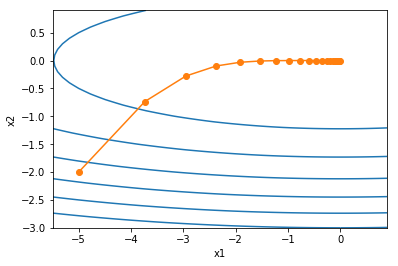

In [5]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2


eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

### 7.6.2 从零开始实现

In [9]:
features, labels = d2l.get_data_ch7()

def init_rmsprop_states():
    s_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        s.data += gamma * s.data + (1 - gamma) * (p.grad.data) ** 2
        p.data -= hyperparams['lr'] * p.grad.data / torch.sqrt(s + eps)

loss: 0.439822, 0.083735 sec per epoch


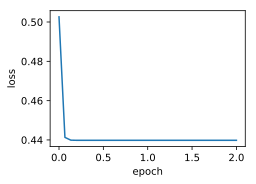

In [10]:
# 学习率0.01, gamma = 0.9 , 所以是最近1/(1-0.9)=10个时间步的平方和
d2l.train_ch7(rmsprop, init_rmsprop_states(), {'lr': 0.01, 'gamma': 0.9},
              features, labels)

### 7.6.3 简洁实现

loss: 0.244612, 0.062832 sec per epoch


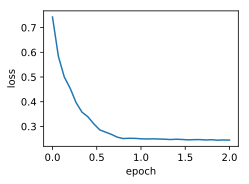

In [11]:
d2l.train_pytorch_ch7(torch.optim.RMSprop, {'lr': 0.01, 'alpha': 0.9},
                    features, labels)